In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import time
import matplotlib 
matplotlib.rc_file_defaults()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
params = {'xtick.labelsize': 10, 'ytick.labelsize': 10}
matplotlib.rcParams.update(params)
pd.set_option('display.max_columns', None)

## Primer Plot

In [161]:
file_guias = "guias_sqm20210830_20220202.xlsx"
file_stats = "SQMStats_Pangamos_20210830-20220203v3.xlsx"
df = pd.read_excel(file_stats)
df = df[(df["Producto"].notna()) & (df["Producto"].str.contains("MOP"))]
df.shape

(3424, 32)

In [162]:
#pd.set_option("display.max_columns", None)
pdf = []
rangos = [0, 15, 30, 45, 60, 75, 90, 120, 180, 240, 300, 360]
for i in range(1,len(rangos)):
    pdf.append(df[(df["Tiempo Total en Puerto"] > rangos[i-1]) & (df["Tiempo Total en Puerto"] <= rangos[i])].shape[0])
    
pdf = np.array(pdf)
pdf

array([  4, 409, 852, 597, 454, 256, 269, 208, 176,  21,  15])

In [163]:
tot = pdf.sum()
perc = 100*np.array(pdf)/tot
tot

3261

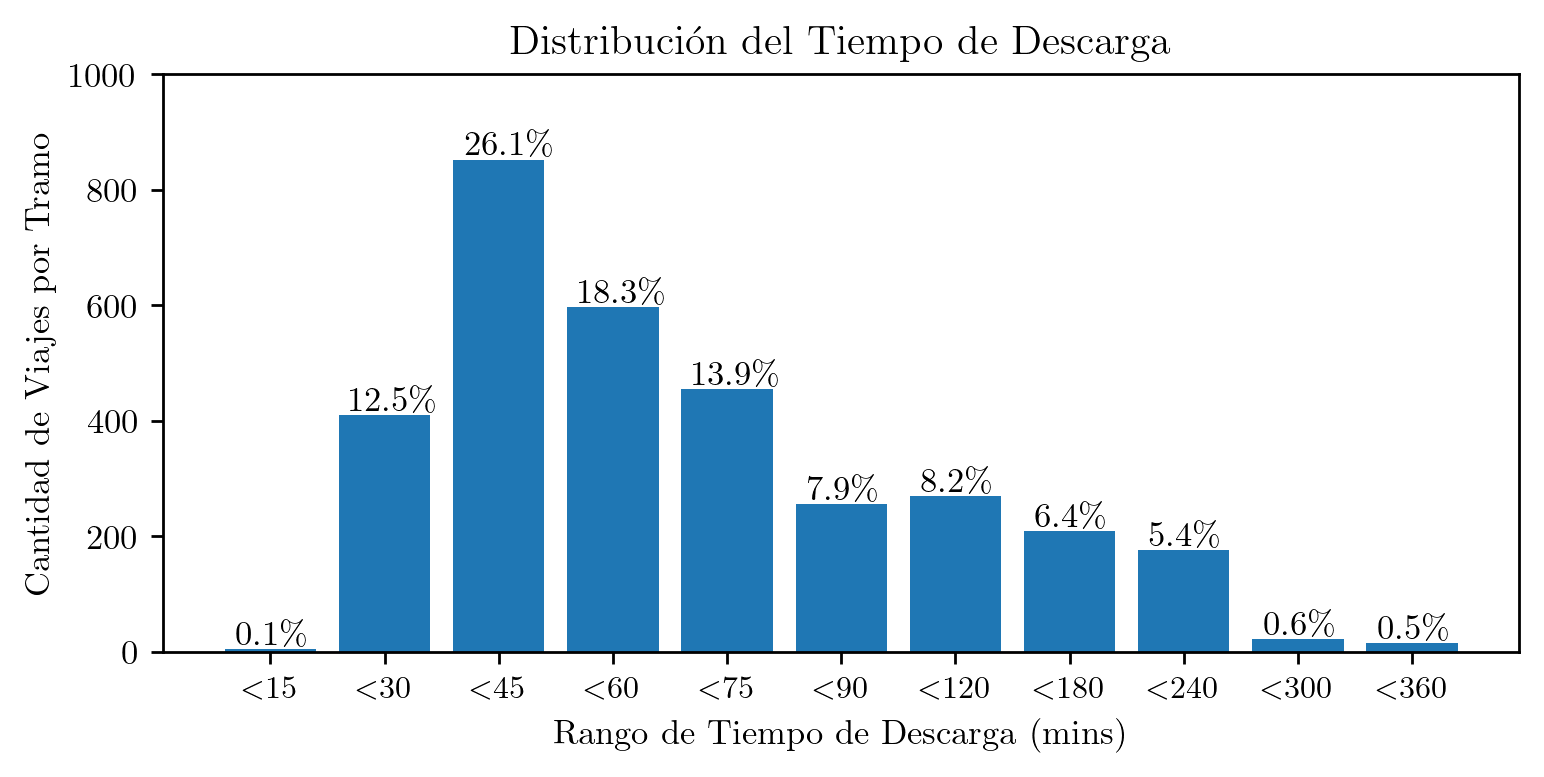

In [164]:
parameters = {'xtick.labelsize': 9, 'ytick.labelsize': 10}
plt.rcParams.update(parameters)
bins = np.array([r"$<$"+str(i) for i in rangos[1:]])
fig = plt.figure(figsize=(7,3), dpi = 250)

ax1 = fig.add_subplot(111)

ax1.set_title("Distribución del Tiempo de Descarga")
ax1.set_ylabel("Cantidad de Viajes por Tramo")
ax1.set_xlabel("Rango de Tiempo de Descarga (mins)")
ax1.bar(bins, pdf, label = "Viajes")
ax1.set_ylim([0,1000])

#ax2 = ax1.twinx()
#ax2.plot(bins, perc, "ro", label = "Porcentaje")#, markerzise = 2)
#ax2.set_ylabel("Porcentaje \%", fontsize = 13)


ax2.set_ylim([0,30])

for i, label in enumerate(perc):
    plt.annotate(str(round(label,1))+"\%", (i-0.3, pdf[i]+7.9))
    


plt.savefig("Graficos/Distribucion Tiempo Descarga.png", bbox_inches= "tight")    

## Segundo Plot


In [165]:
import datetime

In [166]:
df_mop = df[(df["Producto"].notna()) & (df["Producto"].str.contains("MOP")) & (df["Hora Ingreso a Puerto"].notna())]
df_mop.reset_index(drop = True, inplace = True)
df_mop.shape

(3296, 32)

In [167]:
t1 = datetime.time(0,0,0)
t2 = datetime.time(8,30,0)
t3 = datetime.time(10,0,0)
t4 = datetime.time(12,0,0)
t5 = datetime.time(14,0,0)
t6 = datetime.time(15,30,0)
t7 = datetime.time(17,0,0)
t8 = datetime.time(19,0,0)
t9 = datetime.time(21,0,0)
t10 = datetime.time(22,30,0)
t11 = datetime.time(23,59,59)


T = np.array([t1, t2, t3, t4, t5, t6, t7, t8, t9, t10, t11])


turnos = np.array(["Pre", "T1A", "T1B", "T1C", "Almuerzo",
          "T2A", "T2B", "T2C", "T2D", "Post"])

In [168]:
df_mop["Fecha Ingreso a Puerto"] = df_mop["Hora Ingreso a Puerto"].astype(str).apply(lambda x: x.split(" ")[0])
df_mop["Hrs Ingreso a Puerto"] = df_mop["Hora Ingreso a Puerto"].astype(str).apply(lambda x: x.split(" ")[1])
df_mop.head(2)

<ipython-input-168-c8bfab18726b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mop["Fecha Ingreso a Puerto"] = df_mop["Hora Ingreso a Puerto"].astype(str).apply(lambda x: x.split(" ")[0])
<ipython-input-168-c8bfab18726b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mop["Hrs Ingreso a Puerto"] = df_mop["Hora Ingreso a Puerto"].astype(str).apply(lambda x: x.split(" ")[1])


,Flota,Patente,Tipo,N Guia,Fecha,Producto,Viaje,Origen,Origen inicio,Origen salida,Destino,Destino termino,Hora Legada a Espera,Tiempo Espera [minutos],Hora Ingreso a Puerto,Tiempo Total en Puerto,Tiempo total Descarga,Nombre Cancha,Nombre Geo Espera Exterior,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Fecha Ingreso a Puerto,Hrs Ingreso a Puerto
0,Astudillo,PJCJ50,GPS,124839,20210830 14:32:00,MOP-GR PLUS,Salar de Atacama-Puerto Angamos,Salar de Atacama,20210830 12:35:34,20210830 12:35:34,Puerto Angamos,20210831 10:07:29,20210830 19:44:12,752.233333,20210831 08:29:21,98.133333,11.116667,[uDeposito,uStacking],Parqueo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20210831,08:29:21
1,Astudillo,PDWC55,GPS,124838,20210830 14:30:00,MOP-GR PLUS,Salar de Atacama-Puerto Angamos,Salar de Atacama,20210830 12:20:42,20210830 12:20:42,Puerto Angamos,20210831 10:04:21,20210830 19:44:29,755.083333,20210831 08:33:22,90.983333,15.016667,[uDeposito,uStacking],Parqueo - Espera 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20210831,08:33:22


In [169]:
def Turno(str_t):
    hrs = str_t.split(":")
    t = datetime.time(int(hrs[0]),int(hrs[1]),int(hrs[2]))

    tur = ""
    for i in range(0, len(T)):
        if t < T[i+1]:
            tur = turnos[i]
            return tur

In [170]:
Turno(df_mop["Hrs Ingreso a Puerto"][3])

'T1A'

In [171]:
df_mop["Turno"] = df_mop["Hrs Ingreso a Puerto"].apply(lambda x: Turno(x))
df_mop.tail()

<ipython-input-171-359ed54cb414>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mop["Turno"] = df_mop["Hrs Ingreso a Puerto"].apply(lambda x: Turno(x))


,Flota,Patente,Tipo,N Guia,Fecha,Producto,Viaje,Origen,Origen inicio,Origen salida,Destino,Destino termino,Hora Legada a Espera,Tiempo Espera [minutos],Hora Ingreso a Puerto,Tiempo Total en Puerto,Tiempo total Descarga,Nombre Cancha,Nombre Geo Espera Exterior,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Fecha Ingreso a Puerto,Hrs Ingreso a Puerto,Turno
3291,Astudillo,PFVH31,GPS,169570,20220201 17:55:00,MOP-G R 59,Salar de Atacama-Puerto Angamos,Salar de Atacama,20220201 16:55:40,20220201 16:55:40,Puerto Angamos,20220202 13:09:32,20220202 08:23:30,96.033333,20220202 09:59:32,190.000000,187.633333,[uDescarga KCL,uDescarga KCL,uDeposito,uStacking],Ruta 1 PA - Espera 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20220202,09:59:32,T1A
3292,Astudillo,PFVL72,GPS,169578,20220201 18:25:00,MOP-G R 59,Salar de Atacama-Puerto Angamos,Salar de Atacama,20220201 17:10:46,20220201 17:10:46,Puerto Angamos,20220202 13:10:59,20220202 08:36:33,87.016667,20220202 10:03:34,187.416667,177.066667,[uDescarga KCL,uDeposito,uStacking],Ruta 1 PA - Espera 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20220202,10:03:34,T1B
3293,Astudillo,PYXD17,GPS,169580,20220201 18:29:00,MOP-G R 59,Salar de Atacama-Puerto Angamos,Salar de Atacama,20220201 17:19:48,20220201 17:19:48,Puerto Angamos,20220202 13:12:37,20220202 09:43:02,22.016667,20220202 10:06:03,186.566667,185.483333,[uDescarga KCL,uDescarga KCL,uDeposito,uStacking],Ruta 1 PA - Espera 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20220202,10:06:03,T1B
3294,Astudillo,PDWC70,GPS,169579,20220201 18:27:00,MOP-G R 59,Salar de Atacama-Puerto Angamos,Salar de Atacama,20220201 17:18:44,20220201 17:18:44,Puerto Angamos,20220202 13:26:52,20220202 09:43:51,24.550000,20220202 10:11:24,195.466667,186.583333,[uDescarga KCL,uDescarga KCL,uDeposito,uStacking],Ruta 1 PA - Espera 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20220202,10:11:24,T1B
3295,Astudillo,PJCJ12,GPS,169568,20220201 17:49:00,MOP-G R 59,Salar de Atacama-Puerto Angamos,Salar de Atacama,20220201 16:39:36,20220201 16:39:36,Puerto Angamos,20220202 13:28:30,20220202 11:34:33,22.600000,20220202 11:57:09,91.350000,84.200000,[uDescarga KCL,uDescarga KCL,uDeposito,uStacking],Ruta 1 PA - Espera 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20220202,11:57:09,T1B


In [172]:
df_mop["Turno"].unique()

array(['Pre', 'T1A', 'T1B', 'T1C', 'Almuerzo', 'T2A', 'T2B', 'T2C', 'T2D',
       'Post'], dtype=object)

In [173]:
N_truck = [df_mop[df_mop["Turno"] == turnos[i]].shape[0] for i in range(len(turnos))]
N_truck = np.array(N_truck)
N_truck

array([ 66, 567, 439, 411, 244, 386, 402, 417, 232, 132])

In [174]:
df_mop["Tiempo Total en Puerto"][df_mop["Turno"] == 'Pre'].mean()

89.28156565657423

In [175]:
T_prom = np.array([df_mop["Tiempo Total en Puerto"][df_mop["Turno"] == turnos[i]].mean() for i in range(len(turnos))])
T_prom

array([89.28156566, 69.81834215, 74.54719058, 76.81565288, 81.92554645,
       70.6787133 , 63.83731343, 79.90419664, 77.06479885, 98.59684343])

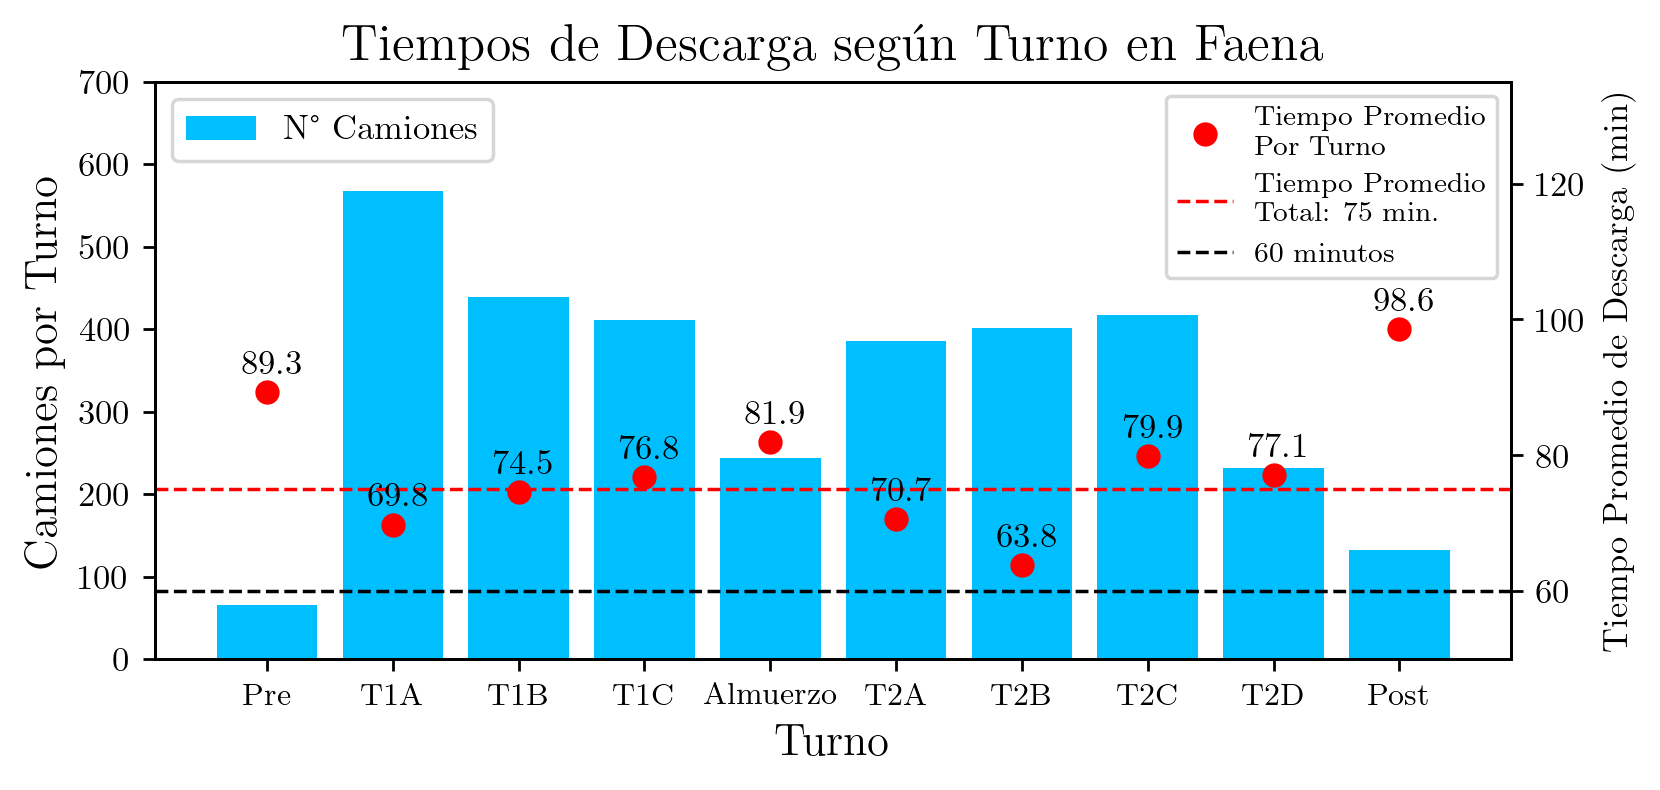

In [176]:
parameters = {'xtick.labelsize': 9, 'ytick.labelsize': 10}
plt.rcParams.update(parameters)
fig = plt.figure(figsize=(7,3), dpi = 250)

ax1 = fig.add_subplot(111)

ax1.set_ylabel("Camiones por Turno", fontsize = 13)
ax1.bar(turnos, N_truck, label = "N° Camiones", color = "deepskyblue")
ax1.set_ylim([0,700])
ax1.set_xlabel("Turno", fontsize = 13)
ax1.legend(loc = "upper left")


ax2 = ax1.twinx() 

ax2.plot(turnos, T_prom, "ro", label = "Tiempo Promedio \n Por Turno")
ax2.set_title("Tiempos de Descarga según Turno en Faena", fontsize = 15)
ax2.set_ylabel("Tiempo Promedio de Descarga (min)")
ax2.axhline(y = 75, c = "r", 
                linestyle = "--", linewidth = 1, 
            label = "Tiempo Promedio \n Total: "+ str(round(75)) + " min.")
ax2.axhline(y = 60., c = "k", 
                linestyle = "--", linewidth = 1, label = "60 minutos")

ax2.set_ylim([50,135])
ax2.legend(fontsize = 8)


for i, label in enumerate(T_prom):
    plt.annotate(str(round(label,1)), (i-0.2, T_prom[i]+2.7))


plt.savefig("Graficos/Tiempos de Descarga por Turno.png", bbox_inches= "tight") 

## Tercer Plot

In [177]:
df_mop.head(2)

,Flota,Patente,Tipo,N Guia,Fecha,Producto,Viaje,Origen,Origen inicio,Origen salida,Destino,Destino termino,Hora Legada a Espera,Tiempo Espera [minutos],Hora Ingreso a Puerto,Tiempo Total en Puerto,Tiempo total Descarga,Nombre Cancha,Nombre Geo Espera Exterior,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Fecha Ingreso a Puerto,Hrs Ingreso a Puerto,Turno
0,Astudillo,PJCJ50,GPS,124839,20210830 14:32:00,MOP-GR PLUS,Salar de Atacama-Puerto Angamos,Salar de Atacama,20210830 12:35:34,20210830 12:35:34,Puerto Angamos,20210831 10:07:29,20210830 19:44:12,752.233333,20210831 08:29:21,98.133333,11.116667,[uDeposito,uStacking],Parqueo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20210831,08:29:21,Pre
1,Astudillo,PDWC55,GPS,124838,20210830 14:30:00,MOP-GR PLUS,Salar de Atacama-Puerto Angamos,Salar de Atacama,20210830 12:20:42,20210830 12:20:42,Puerto Angamos,20210831 10:04:21,20210830 19:44:29,755.083333,20210831 08:33:22,90.983333,15.016667,[uDeposito,uStacking],Parqueo - Espera 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20210831,08:33:22,T1A


In [178]:
fecha = df_mop["Fecha Ingreso a Puerto"].unique()
len(fecha)

38

In [179]:
N_truck = [df_mop[df_mop["Fecha Ingreso a Puerto"] == fecha[i]].shape[0] for i in range(len(fecha))]
N_truck = np.array(N_truck)
N_truck

array([119, 106, 124, 125, 128, 132, 131, 118, 106,  99,  56, 137,  96,
        95,  66,  38, 128, 106,  92, 127,  78,  21,  19,  11,  21,  32,
        33,  70,  80, 103, 110,  75, 137, 106,  83,  80,  86,  22])

In [180]:
T_prom = np.array([df_mop["Tiempo Total en Puerto"][df_mop["Fecha Ingreso a Puerto"] == fecha[i]].mean() for i in range(len(fecha))])
T_prom

array([111.72689076,  81.37971698,  43.62782258,  39.17066667,
        56.42591146,  47.44015152,  45.77099237, 101.52019774,
       107.40801887,  74.63417508,  59.19434524, 113.11958637,
        47.66979167,  47.88508772,  38.29621212,  49.98201754,
        98.64023438,  52.90754717, 190.63043478, 121.37467192,
       200.23867521,  62.94603175,  50.46315789,  64.0969697 ,
        45.10714286,  70.64583333,  50.31414141,  59.45333333,
        55.65875   ,  49.88478964,  57.28287879,  66.00488889,
        51.6323601 ,  51.77625786,  44.77309237,  49.90041667,
       105.84089147, 139.22651515])

In [181]:
fechas = [i[4:6] +"/" + i[6:] for i in fecha]
fechas

['08/31',
 '09/01',
 '09/02',
 '09/03',
 '09/04',
 '09/05',
 '09/06',
 '09/07',
 '09/08',
 '09/23',
 '09/24',
 '09/25',
 '09/26',
 '09/27',
 '09/28',
 '09/29',
 '09/30',
 '10/01',
 '10/02',
 '10/03',
 '10/04',
 '01/17',
 '01/18',
 '01/19',
 '01/20',
 '01/21',
 '01/22',
 '01/23',
 '01/24',
 '01/25',
 '01/26',
 '01/27',
 '01/28',
 '01/29',
 '01/30',
 '01/31',
 '02/01',
 '02/02']

<ipython-input-193-048a68194985>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(fechas, rotation = 90,


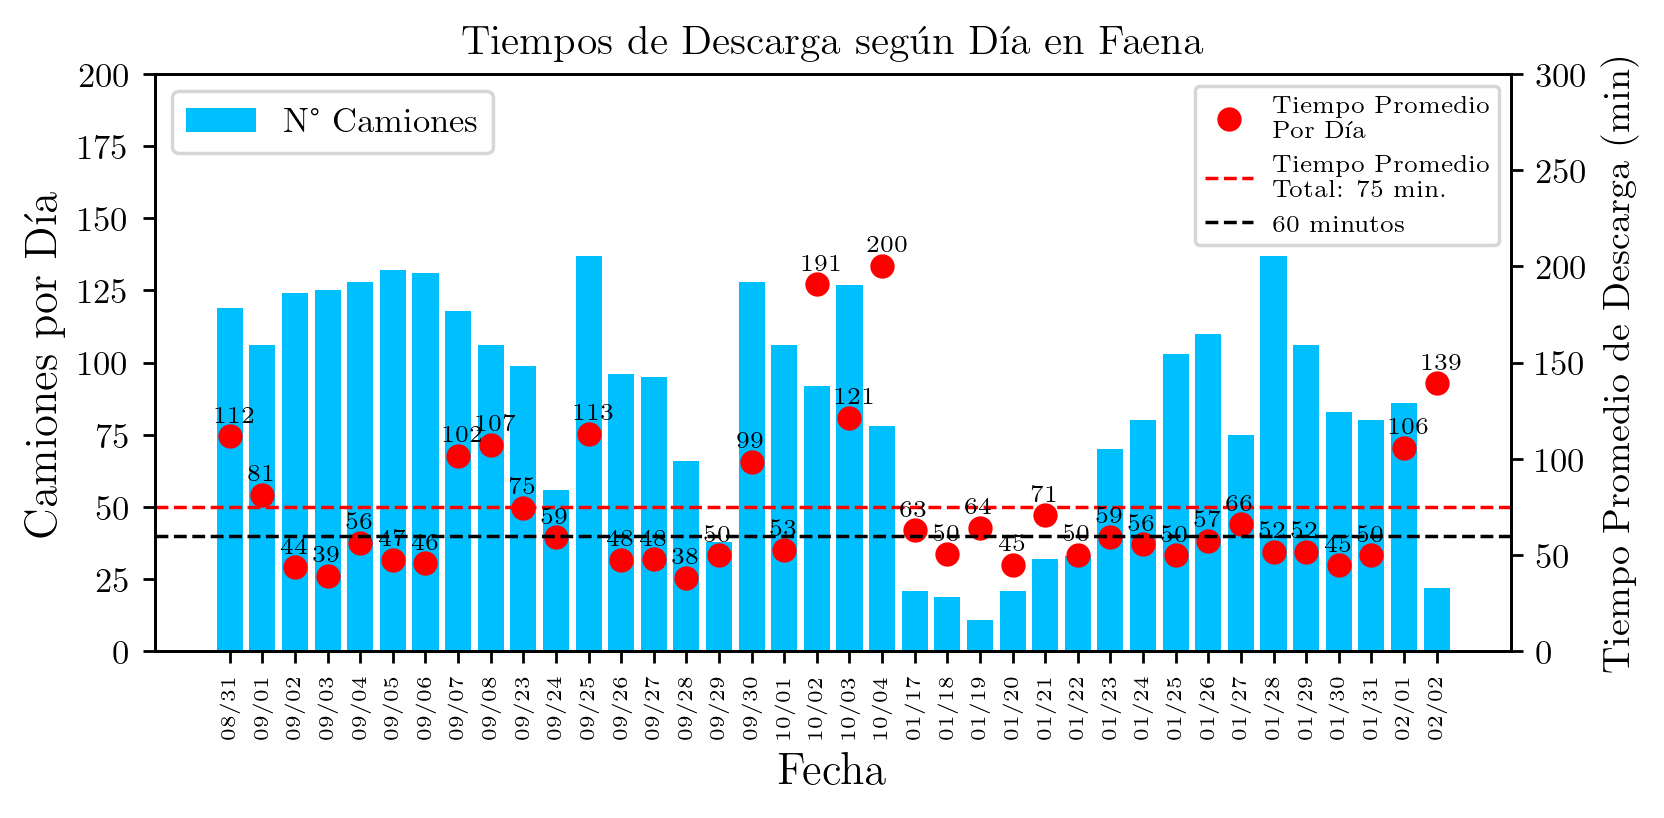

In [193]:
parameters = {'xtick.labelsize': 9, 'ytick.labelsize': 10}
plt.rcParams.update(parameters)
fig = plt.figure(figsize=(7,3), dpi = 250)

ax1 = fig.add_subplot(111)


ax1.set_ylabel("Camiones por Día", fontsize = 13)
ax1.bar(fechas, N_truck, label = "N° Camiones", color = "deepskyblue")
ax1.set_ylim([0,200])
ax1.set_xlabel("Fecha", fontsize  = 13)
ax1.set_xticklabels(fechas, rotation = 90, 
                    fontdict = {"horizontalalignment": "center"}, fontsize = 6)
ax1.legend(loc = "upper left")


ax2 = ax1.twinx() 

ax2.plot(fechas, T_prom, "ro", label = "Tiempo Promedio \n Por Día")
ax2.set_title("Tiempos de Descarga según Día en Faena")
ax2.set_ylabel("Tiempo Promedio de Descarga (min)", fontsize = 11)
ax2.axhline(y = 75, c = "r", 
                linestyle = "--", linewidth = 1, 
            label = "Tiempo Promedio \n Total: "+ str(round(75)) + " min.")
ax2.axhline(y = 60., c = "k", 
                linestyle = "--", linewidth = 1, label = "60 minutos")

ax2.set_ylim([0,300])
ax2.legend(fontsize = 7)


for i, label in enumerate(T_prom):
    plt.annotate(str(round(label)), (i-0.45, T_prom[i]+7.5), fontsize = 7)


plt.savefig("Graficos/Tiempos de Descarga por Dia.png", bbox_inches= "tight")

## Tercer Plot V2

In [183]:
dia = [1, 30, 31, 30, 31, 31, 2]
mes = ["08", "09", "10", "11", "12", "01", "02"]
año = ["2021", "2022"]

cambio = 5
Fecha = []

for i in range(len(mes)):
    for j in range(dia[i]):
        if i < cambio: 
            if len(str(j+1)) > 1:
                Fecha.append(año[0]+mes[i]+str(j+1))
            else:
                Fecha.append(año[0]+mes[i]+"0"+str(j+1))
        else:
            if len(str(j+1)) > 1:
                Fecha.append(año[1]+mes[i]+str(j+1))
            else:
                Fecha.append(año[1]+mes[i]+"0"+str(j+1))

Fecha = np.array(Fecha)
Fecha[0] = "20210831"

In [184]:
N_camiones = []
for idx, val in enumerate(Fecha):
    if val in fecha:
        N_camiones.append(N_truck[list(fecha).index(val)])
    else:
        N_camiones.append(0.)

In [185]:
T_proms = []
for idx, val in enumerate(Fecha):
    if val in fecha:
        T_proms.append(T_prom[list(fecha).index(val)])
    else:
        T_proms.append(0.)

In [186]:
len(N_camiones), len(T_proms)

(156, 156)

<ipython-input-187-5017e83e5117>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(fecha, rotation=45)


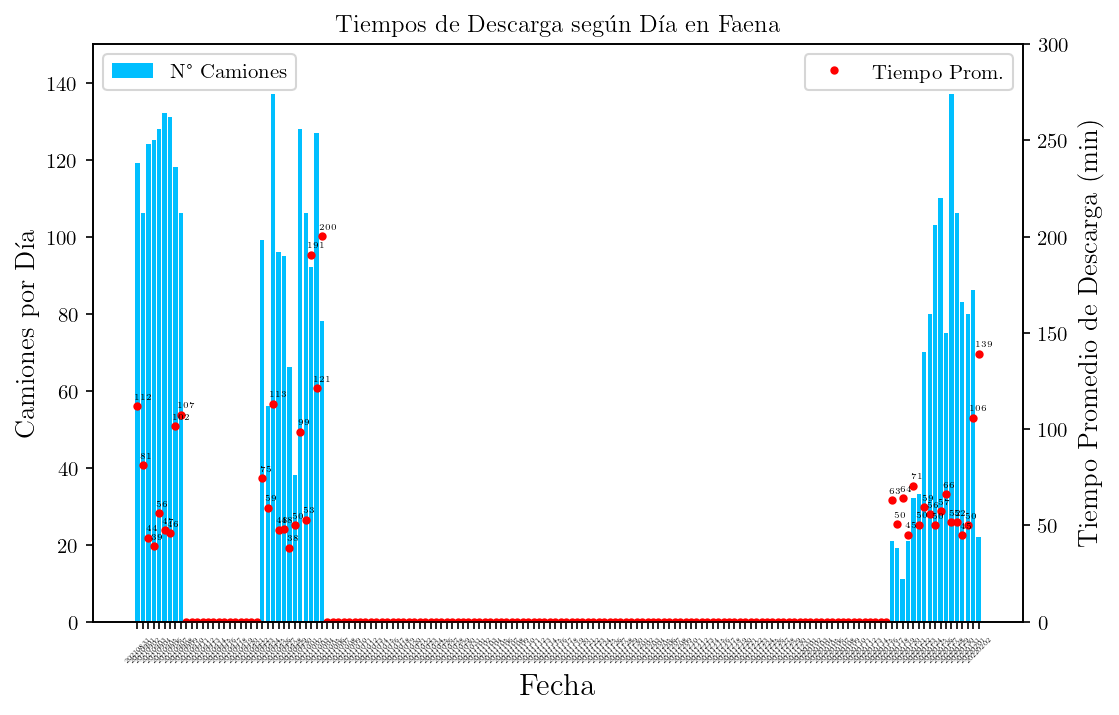

In [187]:
parameters = {'xtick.labelsize': 3, 'ytick.labelsize': 10}
plt.rcParams.update(parameters)
fig = plt.figure(figsize=(8,5), dpi = 150)

ax1 = fig.add_subplot(111)


ax1.set_ylabel("Camiones por Día", fontsize = 13)
ax1.bar(Fecha, N_camiones, label = "N° Camiones", color = "deepskyblue")
ax1.set_ylim([0,150])
ax1.set_xlabel("Fecha", fontsize  = 15)
ax1.set_xticklabels(fecha, rotation=45)
ax1.legend(loc = "upper left")


ax2 = ax1.twinx() 

ax2.plot(Fecha, T_proms, "r.", label = "Tiempo Prom.")
ax2.set_title("Tiempos de Descarga según Día en Faena")
ax2.set_ylabel("Tiempo Promedio de Descarga (min)", fontsize = 13)

ax2.set_ylim([0,300])
ax2.legend()


for i, label in enumerate(T_proms):
    if label != 0:
        plt.annotate(str(round(label)), (i-0.5, T_proms[i]+3.7), fontsize = 4)


plt.savefig("Tiempos de Descarga por Dia V2.png", bbox_inches= "tight")

In [188]:
pd.set_option('display.max_columns', None)
df_mop.head(2)

,Flota,Patente,Tipo,N Guia,Fecha,Producto,Viaje,Origen,Origen inicio,Origen salida,Destino,Destino termino,Hora Legada a Espera,Tiempo Espera [minutos],Hora Ingreso a Puerto,Tiempo Total en Puerto,Tiempo total Descarga,Nombre Cancha,Nombre Geo Espera Exterior,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Fecha Ingreso a Puerto,Hrs Ingreso a Puerto,Turno
0,Astudillo,PJCJ50,GPS,124839,20210830 14:32:00,MOP-GR PLUS,Salar de Atacama-Puerto Angamos,Salar de Atacama,20210830 12:35:34,20210830 12:35:34,Puerto Angamos,20210831 10:07:29,20210830 19:44:12,752.233333,20210831 08:29:21,98.133333,11.116667,[uDeposito,uStacking],Parqueo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20210831,08:29:21,Pre
1,Astudillo,PDWC55,GPS,124838,20210830 14:30:00,MOP-GR PLUS,Salar de Atacama-Puerto Angamos,Salar de Atacama,20210830 12:20:42,20210830 12:20:42,Puerto Angamos,20210831 10:04:21,20210830 19:44:29,755.083333,20210831 08:33:22,90.983333,15.016667,[uDeposito,uStacking],Parqueo - Espera 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20210831,08:33:22,T1A
